# MOGDx Network Generation

This is the computationally most expensive architecture, but requires the least amount of knowledge. 

The processing step occurs within each cross validation split such that similarity features are only identified within each split. 

In [5]:
import pandas as pd
import numpy as np
import os
import sys 

sys.path.insert(0 , './../')
from MAIN.utils import *
from MAIN.train import *
import MAIN.preprocess_functions
from MAIN.GNN_MME import GCN_MME , GSage_MME , GAT_MME

import torch
import torch.nn.functional as F
import dgl
from dgl.dataloading import MultiLayerFullNeighborSampler
import matplotlib.pyplot as plt
from palettable import wesanderson
from sklearn.model_selection import StratifiedKFold , train_test_split
import networkx as nx
from datetime import datetime
import joblib
import warnings
import gc
import copy

warnings.filterwarnings("ignore")

print("Finished Library Import \n")

Finished Library Import 



In [6]:
data_input = './../../data/TCGA/BRCA/raw/'
snf_net = 'RPPA_mRNA_graph.graphml'
index_col = 'patient'
target = 'paper_BRCA_Subtype_PAM50'

Using cuda device
Total = 42.4Gb 	 Reserved = 0.0Gb 	 Allocated = 0.0Gb
StratifiedKFold(n_splits=2, random_state=None, shuffle=True)
Performing Logistic Regression for Feature Selection


Loss : 0.6042: 100%|██████████| 1000/1000 [00:02<00:00, 494.66epoch/s]


Model score : 0.877


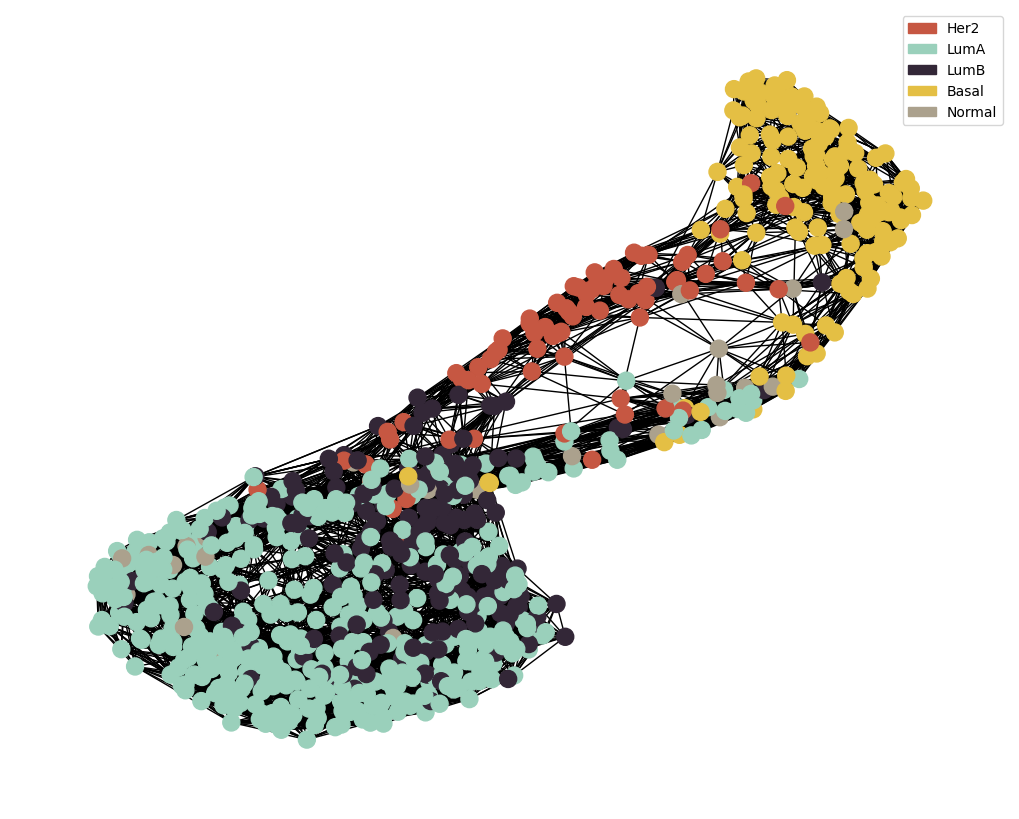

Performing Differential Gene Expression for Feature Selection
Keeping 29995 genes
Removed 30665 genes
Keeping 1047 Samples
Removed 36 Samples


Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 1.23 seconds.

Fitting dispersions...
... done in 10.47 seconds.

Fitting dispersion trend curve...
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 10.90 seconds.

Fitting LFCs...
... done in 7.12 seconds.

Calculating cook's distance...
... done in 1.82 seconds.

Replacing 2948 outlier genes.

Fitting dispersions...
... done in 1.11 seconds.

Fitting MAP dispersions...
... done in 1.02 seconds.

Fitting LFCs...
... done in 1.02 seconds.



Performing contrastive analysis for LumA vs. Her2


Running Wald tests...
... done in 2.55 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 LumA vs Her2
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.045843  0.109944 -0.416972   
ENSG00000000005.6     72.999641        2.364056  0.293465  8.055675   
ENSG00000000419.13  2386.496112       -0.604066  0.062602 -9.649254   
ENSG00000000457.14  1596.783158       -0.062327  0.063247 -0.985452   
ENSG00000000460.17   715.140714       -0.435593  0.080773 -5.392793   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026       -0.955682  0.240269 -3.977559   
ENSG00000288663.1     29.867524        0.627702  0.099567  6.304313   
ENSG00000288670.1    422.158728       -0.075705  0.079346 -0.954105   
ENSG00000288674.1      8.197550        0.337858  0.120301  2.808436   
ENSG00000288675.1     32.370671       -0.912699  0.116411 -7.840287   

                          pvalue          padj  
ENSG00000000003.15  6.

Running Wald tests...
... done in 2.71 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 LumA vs LumB
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130        0.510947  0.075755   6.744707   
ENSG00000000005.6     72.999641        0.680790  0.200628   3.393294   
ENSG00000000419.13  2386.496112       -0.496193  0.043131 -11.504238   
ENSG00000000457.14  1596.783158        0.070789  0.043570   1.624718   
ENSG00000000460.17   715.140714       -0.607113  0.055622 -10.914917   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -0.808325  0.165651  -4.879702   
ENSG00000288663.1     29.867524       -0.053662  0.066356  -0.808701   
ENSG00000288670.1    422.158728       -0.228263  0.054607  -4.180137   
ENSG00000288674.1      8.197550        0.269729  0.080393   3.355135   
ENSG00000288675.1     32.370671        0.324366  0.081632   3.973538   

                          pvalue          padj  
ENSG000000

Running Wald tests...
... done in 2.58 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 LumA vs Normal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.149391  0.151267 -0.987602   
ENSG00000000005.6     72.999641       -0.070272  0.400423 -0.175495   
ENSG00000000419.13  2386.496112        0.052635  0.086204  0.610591   
ENSG00000000457.14  1596.783158        0.460586  0.087118  5.286911   
ENSG00000000460.17   715.140714        0.442141  0.111457  3.966908   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026       -0.735339  0.331180 -2.220363   
ENSG00000288663.1     29.867524        0.106228  0.134479  0.789924   
ENSG00000288670.1    422.158728        0.475525  0.109506  4.342477   
ENSG00000288674.1      8.197550       -0.105403  0.159991 -0.658810   
ENSG00000288675.1     32.370671       -0.340401  0.161826 -2.103501   

                          pvalue      padj  
ENSG00000000003.15  3.23

Running Wald tests...
... done in 3.07 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 LumA vs Basal
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130       -0.445231  0.080360  -5.540469   
ENSG00000000005.6     72.999641        0.121811  0.212744   0.572570   
ENSG00000000419.13  2386.496112       -0.502644  0.045765 -10.983180   
ENSG00000000457.14  1596.783158        0.450413  0.046261   9.736320   
ENSG00000000460.17   715.140714       -1.016645  0.058992 -17.233544   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -1.948089  0.174996 -11.132162   
ENSG00000288663.1     29.867524        0.589213  0.072151   8.166402   
ENSG00000288670.1    422.158728        0.042231  0.058005   0.728061   
ENSG00000288674.1      8.197550        0.081888  0.085157   0.961606   
ENSG00000288675.1     32.370671       -0.328268  0.085826  -3.824821   

                          pvalue          padj  
ENSG00000

Running Wald tests...
... done in 2.57 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 Her2 vs LumB
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130        0.556791  0.121299  4.590230   
ENSG00000000005.6     72.999641       -1.683266  0.323369 -5.205406   
ENSG00000000419.13  2386.496112        0.107873  0.069059  1.562059   
ENSG00000000457.14  1596.783158        0.133116  0.069775  1.907792   
ENSG00000000460.17   715.140714       -0.171520  0.089082 -1.925423   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026        0.147357  0.264721  0.556650   
ENSG00000288663.1     29.867524       -0.681364  0.109132 -6.243507   
ENSG00000288670.1    422.158728       -0.152558  0.087504 -1.743435   
ENSG00000288674.1      8.197550       -0.068130  0.132312 -0.514919   
ENSG00000288675.1     32.370671        1.237065  0.128962  9.592483   

                          pvalue          padj  
ENSG00000000003.15  4.

Running Wald tests...
... done in 2.29 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 Her2 vs Normal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.103548  0.178483 -0.580154   
ENSG00000000005.6     72.999641       -2.434328  0.473977 -5.135963   
ENSG00000000419.13  2386.496112        0.656701  0.101685  6.458198   
ENSG00000000457.14  1596.783158        0.522913  0.102761  5.088644   
ENSG00000000460.17   715.140714        0.877735  0.131394  6.680153   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026        0.220343  0.390278  0.564578   
ENSG00000288663.1     29.867524       -0.521474  0.159972 -3.259780   
ENSG00000288670.1    422.158728        0.551230  0.129099  4.269815   
ENSG00000288674.1      8.197550       -0.443262  0.191417 -2.315687   
ENSG00000288675.1     32.370671        0.572297  0.190145  3.009796   

                          pvalue          padj  
ENSG00000000003.15  

Running Wald tests...
... done in 2.21 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 Her2 vs Basal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.399387  0.124227 -3.214986   
ENSG00000000005.6     72.999641       -2.242245  0.331022 -6.773697   
ENSG00000000419.13  2386.496112        0.101422  0.070733  1.433868   
ENSG00000000457.14  1596.783158        0.512741  0.071486  7.172564   
ENSG00000000460.17   715.140714       -0.581052  0.091224 -6.369509   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026       -0.992407  0.270668 -3.666515   
ENSG00000288663.1     29.867524       -0.038489  0.112749 -0.341369   
ENSG00000288670.1    422.158728        0.117936  0.089665  1.315300   
ENSG00000288674.1      8.197550       -0.255971  0.135260 -1.892439   
ENSG00000288675.1     32.370671        0.584431  0.131657  4.439052   

                          pvalue          padj  
ENSG00000000003.15  1

Running Wald tests...
... done in 2.46 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 LumB vs Normal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.660339  0.159710 -4.134599   
ENSG00000000005.6     72.999641       -0.751062  0.422829 -1.776279   
ENSG00000000419.13  2386.496112        0.548828  0.091000  6.031049   
ENSG00000000457.14  1596.783158        0.389797  0.091967  4.238455   
ENSG00000000460.17   715.140714        1.049255  0.117618  8.920861   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026        0.072986  0.349326  0.208934   
ENSG00000288663.1     29.867524        0.159890  0.141706  1.128321   
ENSG00000288670.1    422.158728        0.703788  0.115554  6.090571   
ENSG00000288674.1      8.197550       -0.375132  0.169207 -2.216998   
ENSG00000288675.1     32.370671       -0.664767  0.171077 -3.885788   

                          pvalue          padj  
ENSG00000000003.15  

Running Wald tests...
... done in 2.19 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 LumB vs Basal
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130       -0.956178  0.095308 -10.032555   
ENSG00000000005.6     72.999641       -0.558979  0.252400  -2.214654   
ENSG00000000419.13  2386.496112       -0.006451  0.054263  -0.118890   
ENSG00000000457.14  1596.783158        0.379624  0.054849   6.921272   
ENSG00000000460.17   715.140714       -0.409531  0.069938  -5.855629   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -1.139764  0.207297  -5.498215   
ENSG00000288663.1     29.867524        0.642875  0.084864   7.575379   
ENSG00000288670.1    422.158728        0.270494  0.068745   3.934774   
ENSG00000288674.1      8.197550       -0.187841  0.101419  -1.852129   
ENSG00000288675.1     32.370671       -0.652634  0.102204  -6.385618   

                          pvalue          padj  
ENSG00000

Running Wald tests...
... done in 2.34 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 Normal vs Basal
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130       -0.295840  0.161945  -1.826789   
ENSG00000000005.6     72.999641        0.192083  0.428710   0.448048   
ENSG00000000419.13  2386.496112       -0.555279  0.092278  -6.017474   
ENSG00000000457.14  1596.783158       -0.010172  0.093272  -0.109060   
ENSG00000000460.17   715.140714       -1.458786  0.119249 -12.233141   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -1.212750  0.353853  -3.427268   
ENSG00000288663.1     29.867524        0.482985  0.144510   3.342218   
ENSG00000288670.1    422.158728       -0.433294  0.117198  -3.697105   
ENSG00000288674.1      8.197550        0.187291  0.171522   1.091936   
ENSG00000288675.1     32.370671        0.012134  0.173117   0.070089   

                          pvalue          padj  
ENSG000

Fitting dispersions...
... done in 9.30 seconds.



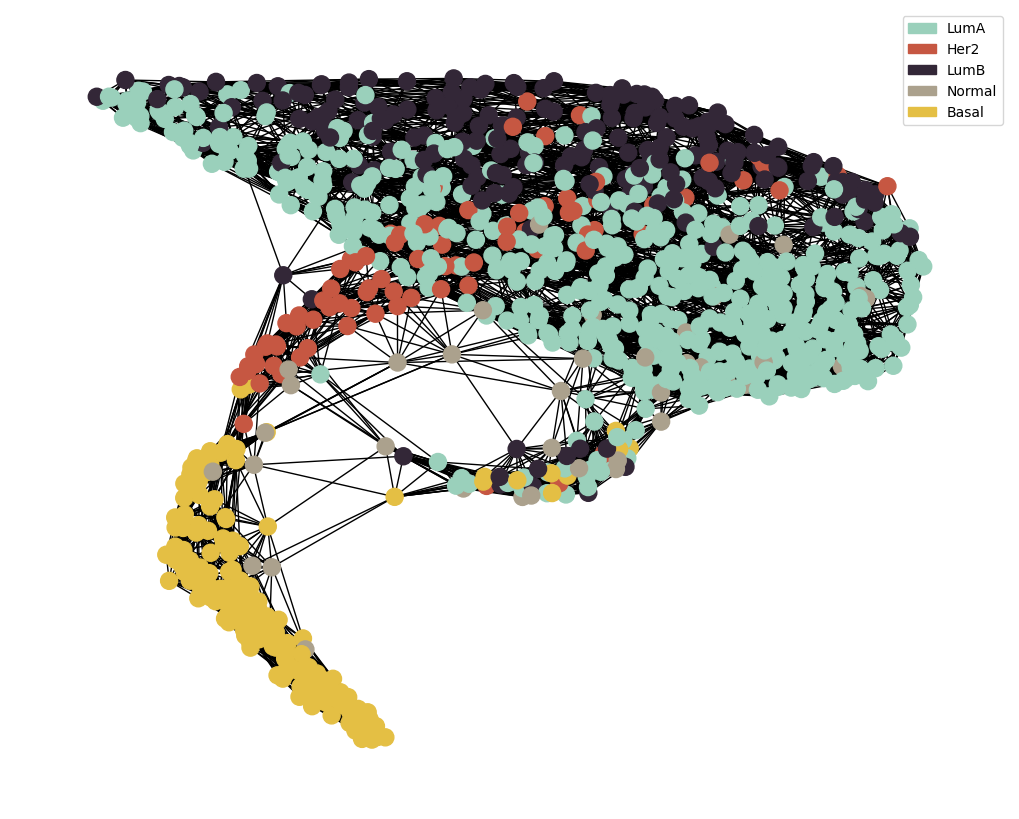

Clearing gpu memory
Total = 42.4Gb 	 Reserved = 0.0Gb 	 Allocated = 0.0Gb


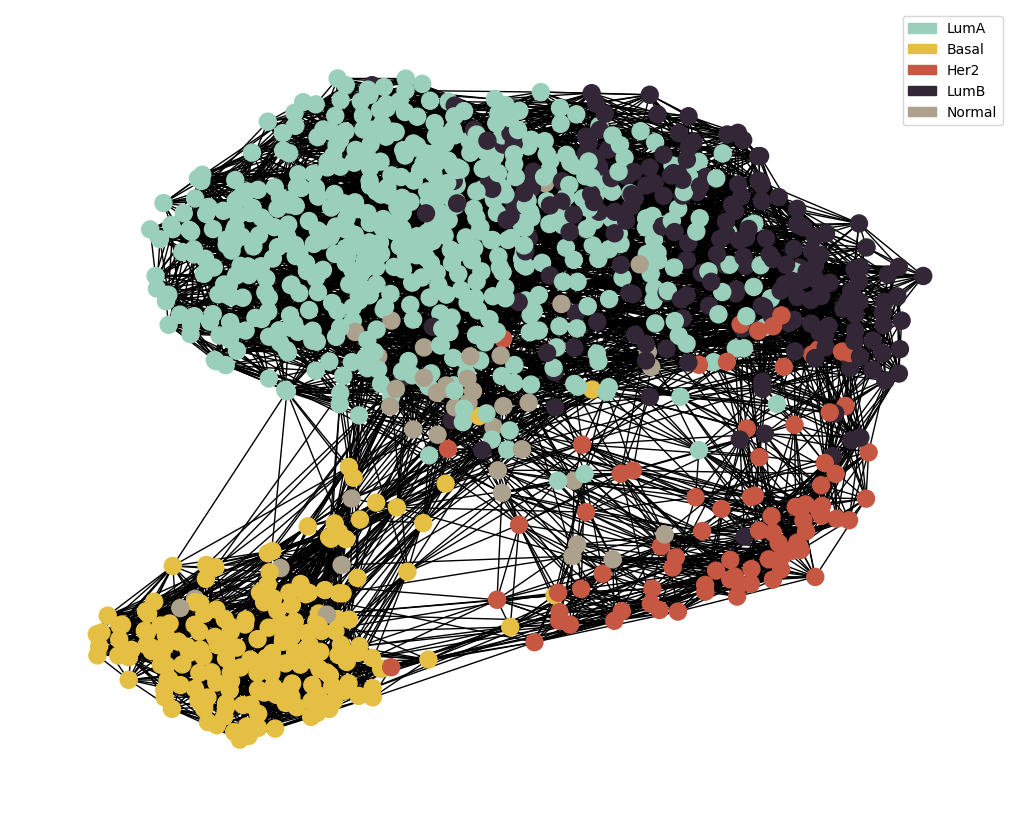

GCN_MME(
  (encoder_dims): ModuleList(
    (0): Encoder(
      (encoder): ModuleList(
        (0): Linear(in_features=464, out_features=500, bias=True)
        (1): Linear(in_features=500, out_features=16, bias=True)
      )
      (norm): ModuleList(
        (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (decoder): Sequential(
        (0): Linear(in_features=16, out_features=64, bias=True)
      )
      (drop): Dropout(p=0.5, inplace=False)
    )
    (1): Encoder(
      (encoder): ModuleList(
        (0): Linear(in_features=29995, out_features=500, bias=True)
        (1): Linear(in_features=500, out_features=16, bias=True)
      )
      (norm): ModuleList(
        (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

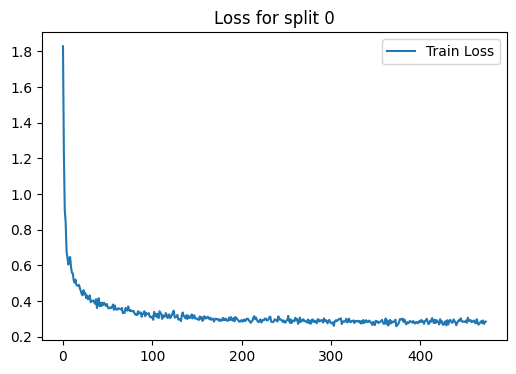

Fold : 1 | Test Accuracy = 0.8364 | F1 = 0.8039 
Total = 42.4Gb 	 Reserved = 0.6Gb 	 Allocated = 0.3Gb
Clearing gpu memory
Total = 42.4Gb 	 Reserved = 0.3Gb 	 Allocated = 0.3Gb
Performing Logistic Regression for Feature Selection


Loss : 0.6041: 100%|██████████| 1000/1000 [00:02<00:00, 406.47epoch/s]


Model score : 0.877


<Figure size 640x480 with 0 Axes>

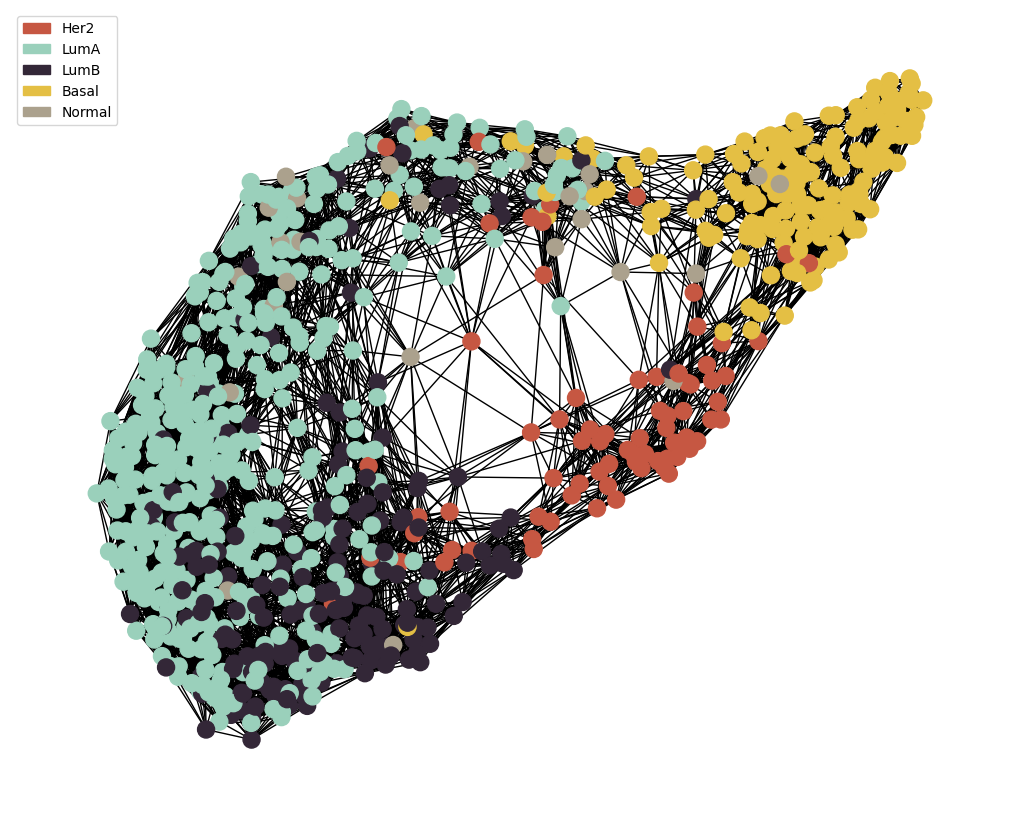

Performing Differential Gene Expression for Feature Selection
Keeping 29995 genes
Removed 30665 genes
Keeping 1047 Samples
Removed 36 Samples


Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 1.19 seconds.

Fitting dispersions...
... done in 10.30 seconds.

Fitting dispersion trend curve...
... done in 0.59 seconds.

Fitting MAP dispersions...
... done in 11.29 seconds.

Fitting LFCs...
... done in 6.66 seconds.

Calculating cook's distance...
... done in 2.13 seconds.

Replacing 2948 outlier genes.

Fitting dispersions...
... done in 1.10 seconds.

Fitting MAP dispersions...
... done in 1.05 seconds.

Fitting LFCs...
... done in 1.00 seconds.



Performing contrastive analysis for LumA vs. Her2


Running Wald tests...
... done in 2.68 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 LumA vs Her2
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.045843  0.109944 -0.416972   
ENSG00000000005.6     72.999641        2.364056  0.293465  8.055675   
ENSG00000000419.13  2386.496112       -0.604066  0.062602 -9.649254   
ENSG00000000457.14  1596.783158       -0.062327  0.063247 -0.985452   
ENSG00000000460.17   715.140714       -0.435593  0.080773 -5.392793   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026       -0.955682  0.240269 -3.977559   
ENSG00000288663.1     29.867524        0.627702  0.099567  6.304313   
ENSG00000288670.1    422.158728       -0.075705  0.079346 -0.954105   
ENSG00000288674.1      8.197550        0.337858  0.120301  2.808436   
ENSG00000288675.1     32.370671       -0.912699  0.116411 -7.840287   

                          pvalue          padj  
ENSG00000000003.15  6.

Running Wald tests...
... done in 2.66 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 LumA vs LumB
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130        0.510947  0.075755   6.744707   
ENSG00000000005.6     72.999641        0.680790  0.200628   3.393294   
ENSG00000000419.13  2386.496112       -0.496193  0.043131 -11.504238   
ENSG00000000457.14  1596.783158        0.070789  0.043570   1.624718   
ENSG00000000460.17   715.140714       -0.607113  0.055622 -10.914917   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -0.808325  0.165651  -4.879702   
ENSG00000288663.1     29.867524       -0.053662  0.066356  -0.808701   
ENSG00000288670.1    422.158728       -0.228263  0.054607  -4.180137   
ENSG00000288674.1      8.197550        0.269729  0.080393   3.355135   
ENSG00000288675.1     32.370671        0.324366  0.081632   3.973538   

                          pvalue          padj  
ENSG000000

Running Wald tests...
... done in 2.08 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 LumA vs Normal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.149391  0.151267 -0.987602   
ENSG00000000005.6     72.999641       -0.070272  0.400423 -0.175495   
ENSG00000000419.13  2386.496112        0.052635  0.086204  0.610591   
ENSG00000000457.14  1596.783158        0.460586  0.087118  5.286911   
ENSG00000000460.17   715.140714        0.442141  0.111457  3.966908   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026       -0.735339  0.331180 -2.220363   
ENSG00000288663.1     29.867524        0.106228  0.134479  0.789924   
ENSG00000288670.1    422.158728        0.475525  0.109506  4.342477   
ENSG00000288674.1      8.197550       -0.105403  0.159991 -0.658810   
ENSG00000288675.1     32.370671       -0.340401  0.161826 -2.103501   

                          pvalue      padj  
ENSG00000000003.15  3.23

Running Wald tests...
... done in 2.11 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 LumA vs Basal
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130       -0.445231  0.080360  -5.540469   
ENSG00000000005.6     72.999641        0.121811  0.212744   0.572570   
ENSG00000000419.13  2386.496112       -0.502644  0.045765 -10.983180   
ENSG00000000457.14  1596.783158        0.450413  0.046261   9.736320   
ENSG00000000460.17   715.140714       -1.016645  0.058992 -17.233544   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -1.948089  0.174996 -11.132162   
ENSG00000288663.1     29.867524        0.589213  0.072151   8.166402   
ENSG00000288670.1    422.158728        0.042231  0.058005   0.728061   
ENSG00000288674.1      8.197550        0.081888  0.085157   0.961606   
ENSG00000288675.1     32.370671       -0.328268  0.085826  -3.824821   

                          pvalue          padj  
ENSG00000

Running Wald tests...
... done in 2.42 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 Her2 vs LumB
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130        0.556791  0.121299  4.590230   
ENSG00000000005.6     72.999641       -1.683266  0.323369 -5.205406   
ENSG00000000419.13  2386.496112        0.107873  0.069059  1.562059   
ENSG00000000457.14  1596.783158        0.133116  0.069775  1.907792   
ENSG00000000460.17   715.140714       -0.171520  0.089082 -1.925423   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026        0.147357  0.264721  0.556650   
ENSG00000288663.1     29.867524       -0.681364  0.109132 -6.243507   
ENSG00000288670.1    422.158728       -0.152558  0.087504 -1.743435   
ENSG00000288674.1      8.197550       -0.068130  0.132312 -0.514919   
ENSG00000288675.1     32.370671        1.237065  0.128962  9.592483   

                          pvalue          padj  
ENSG00000000003.15  4.

Running Wald tests...
... done in 2.60 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 Her2 vs Normal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.103548  0.178483 -0.580154   
ENSG00000000005.6     72.999641       -2.434328  0.473977 -5.135963   
ENSG00000000419.13  2386.496112        0.656701  0.101685  6.458198   
ENSG00000000457.14  1596.783158        0.522913  0.102761  5.088644   
ENSG00000000460.17   715.140714        0.877735  0.131394  6.680153   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026        0.220343  0.390278  0.564578   
ENSG00000288663.1     29.867524       -0.521474  0.159972 -3.259780   
ENSG00000288670.1    422.158728        0.551230  0.129099  4.269815   
ENSG00000288674.1      8.197550       -0.443262  0.191417 -2.315687   
ENSG00000288675.1     32.370671        0.572297  0.190145  3.009796   

                          pvalue          padj  
ENSG00000000003.15  

Running Wald tests...
... done in 2.37 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 Her2 vs Basal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.399387  0.124227 -3.214986   
ENSG00000000005.6     72.999641       -2.242245  0.331022 -6.773697   
ENSG00000000419.13  2386.496112        0.101422  0.070733  1.433868   
ENSG00000000457.14  1596.783158        0.512741  0.071486  7.172564   
ENSG00000000460.17   715.140714       -0.581052  0.091224 -6.369509   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026       -0.992407  0.270668 -3.666515   
ENSG00000288663.1     29.867524       -0.038489  0.112749 -0.341369   
ENSG00000288670.1    422.158728        0.117936  0.089665  1.315300   
ENSG00000288674.1      8.197550       -0.255971  0.135260 -1.892439   
ENSG00000288675.1     32.370671        0.584431  0.131657  4.439052   

                          pvalue          padj  
ENSG00000000003.15  1

Running Wald tests...
... done in 2.62 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 LumB vs Normal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.660339  0.159710 -4.134599   
ENSG00000000005.6     72.999641       -0.751062  0.422829 -1.776279   
ENSG00000000419.13  2386.496112        0.548828  0.091000  6.031049   
ENSG00000000457.14  1596.783158        0.389797  0.091967  4.238455   
ENSG00000000460.17   715.140714        1.049255  0.117618  8.920861   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026        0.072986  0.349326  0.208934   
ENSG00000288663.1     29.867524        0.159890  0.141706  1.128321   
ENSG00000288670.1    422.158728        0.703788  0.115554  6.090571   
ENSG00000288674.1      8.197550       -0.375132  0.169207 -2.216998   
ENSG00000288675.1     32.370671       -0.664767  0.171077 -3.885788   

                          pvalue          padj  
ENSG00000000003.15  

Running Wald tests...
... done in 2.88 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 LumB vs Basal
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130       -0.956178  0.095308 -10.032555   
ENSG00000000005.6     72.999641       -0.558979  0.252400  -2.214654   
ENSG00000000419.13  2386.496112       -0.006451  0.054263  -0.118890   
ENSG00000000457.14  1596.783158        0.379624  0.054849   6.921272   
ENSG00000000460.17   715.140714       -0.409531  0.069938  -5.855629   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -1.139764  0.207297  -5.498215   
ENSG00000288663.1     29.867524        0.642875  0.084864   7.575379   
ENSG00000288670.1    422.158728        0.270494  0.068745   3.934774   
ENSG00000288674.1      8.197550       -0.187841  0.101419  -1.852129   
ENSG00000288675.1     32.370671       -0.652634  0.102204  -6.385618   

                          pvalue          padj  
ENSG00000

Running Wald tests...
... done in 2.37 seconds.



Log2 fold change & Wald test p-value: paper_BRCA_Subtype_PAM50 Normal vs Basal
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130       -0.295840  0.161945  -1.826789   
ENSG00000000005.6     72.999641        0.192083  0.428710   0.448048   
ENSG00000000419.13  2386.496112       -0.555279  0.092278  -6.017474   
ENSG00000000457.14  1596.783158       -0.010172  0.093272  -0.109060   
ENSG00000000460.17   715.140714       -1.458786  0.119249 -12.233141   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -1.212750  0.353853  -3.427268   
ENSG00000288663.1     29.867524        0.482985  0.144510   3.342218   
ENSG00000288670.1    422.158728       -0.433294  0.117198  -3.697105   
ENSG00000288674.1      8.197550        0.187291  0.171522   1.091936   
ENSG00000288675.1     32.370671        0.012134  0.173117   0.070089   

                          pvalue          padj  
ENSG000

Fitting dispersions...
... done in 9.63 seconds.



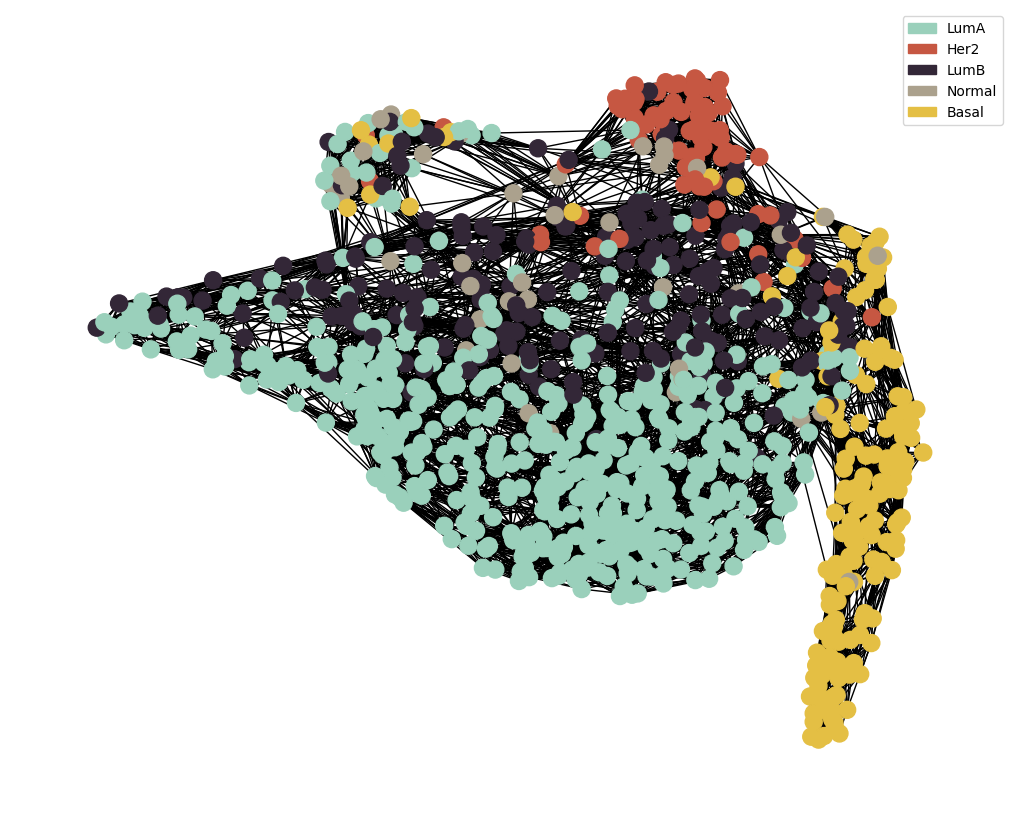

Clearing gpu memory
Total = 42.4Gb 	 Reserved = 0.3Gb 	 Allocated = 0.3Gb


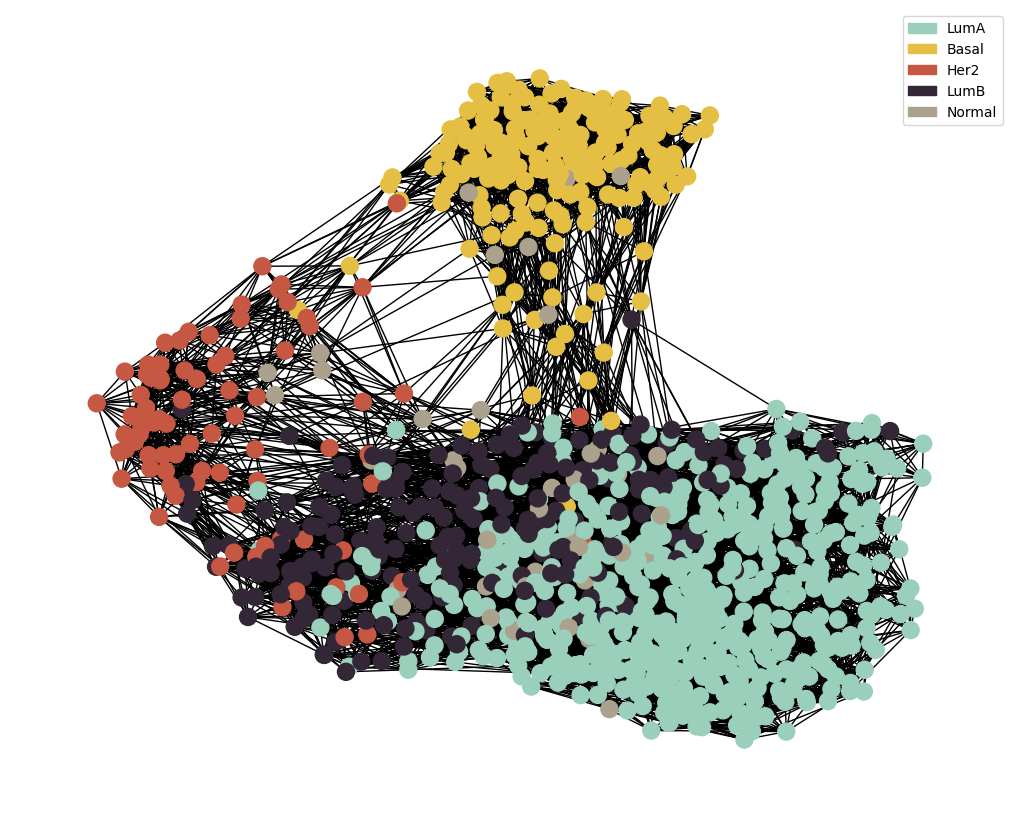

GCN_MME(
  (encoder_dims): ModuleList(
    (0): Encoder(
      (encoder): ModuleList(
        (0): Linear(in_features=464, out_features=500, bias=True)
        (1): Linear(in_features=500, out_features=16, bias=True)
      )
      (norm): ModuleList(
        (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (decoder): Sequential(
        (0): Linear(in_features=16, out_features=64, bias=True)
      )
      (drop): Dropout(p=0.5, inplace=False)
    )
    (1): Encoder(
      (encoder): ModuleList(
        (0): Linear(in_features=29995, out_features=500, bias=True)
        (1): Linear(in_features=500, out_features=16, bias=True)
      )
      (norm): ModuleList(
        (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

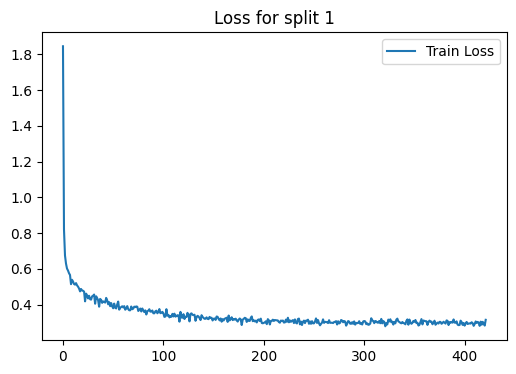

Fold : 2 | Test Accuracy = 0.8290 | F1 = 0.7999 
Total = 42.4Gb 	 Reserved = 0.8Gb 	 Allocated = 0.4Gb
Clearing gpu memory
Total = 42.4Gb 	 Reserved = 0.3Gb 	 Allocated = 0.3Gb


<Figure size 640x480 with 0 Axes>

In [7]:
device = torch.device('cpu' if False else 'cuda') # Get GPU device name, else use CPU
print("Using %s device" % device)
get_gpu_memory()


datModalities , meta = data_parsing(data_input , ['RPPA' , 'mRNA'] , target , index_col , PROCESSED=False)
meta = meta.loc[sorted(meta.index)]

skf = StratifiedKFold(n_splits=2 , shuffle=True) 

print(skf)

data_to_save = {}
output_metrics = []
test_logits = []
test_labels = []
for i, (train_index, test_index) in enumerate(skf.split(meta.index, meta)) :
    h = {}
    MME_input_shapes = []
    
    train_index , val_index = train_test_split(
    train_index, train_size=0.8, test_size=None, stratify=meta.iloc[train_index]
    )
    
    train_idx = list(meta.iloc[train_index].index)
    val_idx   = list(meta.iloc[val_index].index)
    test_idx  = list(meta.iloc[test_index].index)
    
    all_graphs = {}
    data_to_save[i] = {}
    for mod in datModalities : 
        count_mtx = datModalities[mod]
        
        datMeta = meta.loc[count_mtx.index]
        datMeta = datMeta.loc[sorted(datMeta.index)]
        count_mtx = count_mtx.loc[datMeta.index]
        
        train_index_mod = list(set(train_idx) & set(datMeta.index))
        val_index_mod = list(set(val_idx) & set(datMeta.index))
        
        if mod in ['mRNA' , 'miRNA'] : 
            pipeline = 'DESeq' 
            if mod == 'mRNA' : 
                gene_exp = True
            else : 
                gene_exp = False
        else : 
            pipeline = 'LogReg'

        if pipeline == 'DESeq' :
            print('Performing Differential Gene Expression for Feature Selection')
            
            count_mtx , datMeta = MAIN.preprocess_functions.data_preprocess(count_mtx.astype(int).astype(np.float32), 
                                                        datMeta , gene_exp = True)
            
            train_index_mod = list(set(train_index_mod) & set(count_mtx.index))
            dds, vsd, top_genes = MAIN.preprocess_functions.DESEQ(count_mtx , datMeta , target , 
                                        n_genes=500,train_index=train_index_mod)

            data_to_save[i][f'{mod}_extracted_feats'] = list(set(top_genes))
            datExpr = pd.DataFrame(data=vsd , index=count_mtx.index , columns=count_mtx.columns)

        elif pipeline == 'LogReg' : 
            print('Performing Logistic Regression for Feature Selection')
            
            n_genes = count_mtx.shape[1]
            datExpr = count_mtx.loc[: , (count_mtx != 0).any(axis=0)] # remove any genes with all 0 expression
            
            train_index_mod = list(set(train_index_mod) & set(datExpr.index))
            val_index_mod = list(set(val_index_mod) & set(datExpr.index))
            
            extracted_feats , model  = MAIN.preprocess_functions.elastic_net(datExpr , datMeta , 
                                                         train_index=train_index_mod , 
                                                         val_index=val_index_mod ,
                                                         l1_ratio = 1 , num_epochs=1000)

            data_to_save[i][f'{mod}_extracted_feats']  = list(set(extracted_feats))
            data_to_save[i][f'{mod}_model']  = {'model' : model}
            
            del model

        if mod in [] : 
            method = 'bicorr'
        elif mod in [ 'mRNA' , 'RPPA' , 'miRNA' , 'CNV' , 'DNAm'] : 
            method = 'pearson'
        elif mod in [] : 
            method = 'euclidean'
            
        datExpr = datExpr.loc[datMeta.index]

        if len(data_to_save[i][f'{mod}_extracted_feats']) > 0 : 
            G  = MAIN.preprocess_functions.knn_graph_generation(datExpr , datMeta , method=method , 
                                                extracted_feats=data_to_save[i][f'{mod}_extracted_feats'],
                                                node_size =150 , knn = 15 )
        else : 
            G  = MAIN.preprocess_functions.knn_graph_generation(datExpr , datMeta , method=method , 
                                            extracted_feats=None, node_size =150 , knn = 15 )
                
        all_graphs[mod] = G

        h[mod] = datExpr
        MME_input_shapes.append(datExpr.shape[1])
        
    all_idx = list(set().union(*[list(h[mod].index) for mod in h]))
    train_index = indices_removal_adjust(train_index , meta.reset_index()[index_col] , all_idx)
    val_index = indices_removal_adjust(val_index , meta.reset_index()[index_col] , all_idx)
    test_index = indices_removal_adjust(test_index , meta.reset_index()[index_col] , all_idx)
    
    train_index = np.concatenate((train_index , val_index))
    
    gc.collect()
    torch.cuda.empty_cache()
    print('Clearing gpu memory')
    get_gpu_memory()
    
    if len(all_graphs) > 1 : 
        full_graphs = []

        for mod , graph in all_graphs.items() : 
            full_graph = pd.DataFrame(data = np.zeros((len(all_idx) , len(all_idx))) , index=all_idx , columns=all_idx)
            graph = nx.to_pandas_adjacency(graph)
            full_graph.loc[graph.index , graph.index] = graph.values

            full_graphs.append(full_graph)

        adj_snf = MAIN.preprocess_functions.SNF(full_graphs)

        node_colour = meta.loc[adj_snf.index].astype('category').cat.set_categories(wesanderson.FantasticFox2_5.hex_colors , rename=True)

        g  = MAIN.preprocess_functions.plot_knn_network(adj_snf , 15 , meta.loc[adj_snf.index] ,
                                               node_colours=node_colour , node_size=150)
    else : 
        g = list(all_graphs.values())[0]
        
    label = F.one_hot(torch.Tensor(list(meta.loc[sorted(all_idx)].astype('category').cat.codes)).to(torch.int64))
        
    h = reduce(merge_dfs , list(h.values()))
    h = h.loc[sorted(h.index)]

    g = dgl.from_networkx(g , node_attrs=['idx' , 'label'])

    g.ndata['feat'] = torch.Tensor(h.to_numpy())

    g.ndata['label'] = label

    model = GCN_MME(MME_input_shapes , [16 , 16] , 64 , [32], len(meta.unique())).to(device)
    
    print(model)
    print(g)

    g = g.to(device)

    loss_plot = train(g, train_index, device ,  model , label , 2000 , 1e-3 , 100)
    plt.title(f'Loss for split {i}')
    plt.show()
    plt.clf()
    
    sampler = NeighborSampler(
        [15 for i in range(len(model.gnnlayers))],  # fanout for each layer
        prefetch_node_feats=['feat'],
        prefetch_labels=['label'],
    )
    test_dataloader = DataLoader(
        g,
        torch.Tensor(test_index).to(torch.int64).to(device),
        sampler,
        device=device,
        batch_size=1024,
        shuffle=True,
        drop_last=False,
        num_workers=0,
        use_uva=False,
    )
    
    test_output_metrics = evaluate(model , g, test_dataloader)

    print(
        "Fold : {:01d} | Test Accuracy = {:.4f} | F1 = {:.4f} ".format(
        i+1 , test_output_metrics[1] , test_output_metrics[2] )
    )
    
    test_logits.extend(test_output_metrics[-2])
    test_labels.extend(test_output_metrics[-1])
    
    output_metrics.append(test_output_metrics)
    if i == 0 : 
        best_model = model
        best_idx = i
    elif output_metrics[best_idx][1] < test_output_metrics[1] : 
        best_model = model
        best_idx   = i

    get_gpu_memory()
    del model
    gc.collect()
    torch.cuda.empty_cache()
    print('Clearing gpu memory')
    get_gpu_memory()

test_logits = torch.stack(test_logits)
test_labels = torch.stack(test_labels)

5 Fold Cross Validation Accuracy = 83.27 ± 0.37
5 Fold Cross Validation F1 = 80.19 ± 0.20


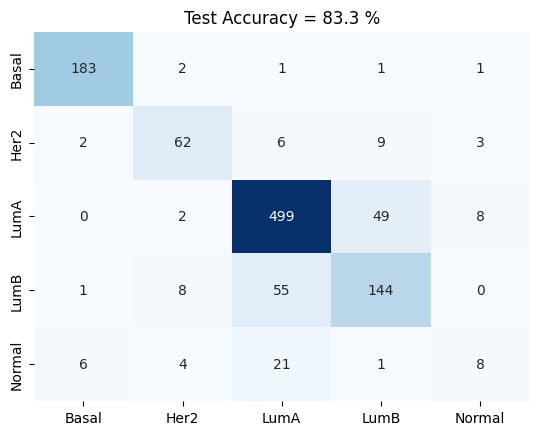

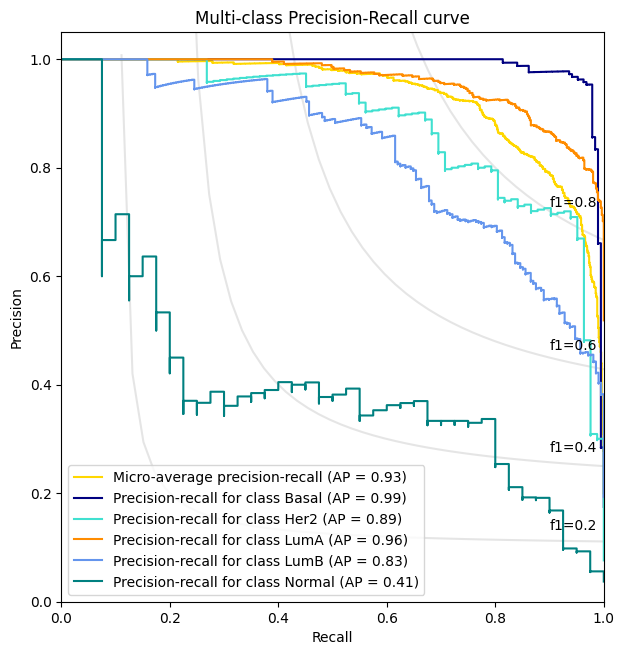

In [8]:
accuracy = []
F1 = []
i = 0
for metric in output_metrics :
    
    accuracy.append(metric[1])
    F1.append(metric[2])


print("%i Fold Cross Validation Accuracy = %2.2f \u00B1 %2.2f" %(5 , np.mean(accuracy)*100 , np.std(accuracy)*100))
print("%i Fold Cross Validation F1 = %2.2f \u00B1 %2.2f" %(5 , np.mean(F1)*100 , np.std(F1)*100))

confusion_matrix(test_logits , test_labels , meta.astype('category').cat.categories)
plt.title('Test Accuracy = %2.1f %%' % (np.mean(accuracy)*100))

precision_recall_plot , all_predictions_conf = AUROC(test_logits, test_labels , meta)

node_predictions = []
true_label = []
display_label = meta.astype('category').cat.categories

for pred , true in zip(all_predictions_conf.argmax(1) , test_labels.argmax(1).detach().cpu())  : 
    node_predictions.append(display_label[pred])
    true_label.append(display_label[true.item()])

preds = pd.DataFrame({'Actual' : true_label , 'Predicted' : node_predictions})